## Классификация FashionMNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [28]:
# do not change the code in the block below
# __________start of block__________
import json
import os
import re

from tqdm import tqdm
import torch.optim as optim
import numpy as np
import torch
import torchvision
from IPython.display import clear_output
from matplotlib import pyplot as plt
from torch import nn
from torch.nn import functional as F
from torchvision.datasets import FashionMNIST

# __________end of block__________

In [8]:
# do not change the code in the block below
# __________start of block__________
def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx : idx + step].to(device))
            predicted_labels.append(y_predicted.argmax(dim=1).cpu())

    predicted_labels = torch.cat(predicted_labels)
    predicted_labels = ",".join([str(x.item()) for x in list(predicted_labels)])
    return predicted_labels


def get_accuracy(model, data_loader):
    predicted_labels = []
    real_labels = []
    model.eval()
    with torch.no_grad():
        for batch in data_loader:
            y_predicted = model(batch[0].to(device))
            predicted_labels.append(y_predicted.argmax(dim=1).cpu())
            real_labels.append(batch[1])

    predicted_labels = torch.cat(predicted_labels)
    real_labels = torch.cat(real_labels)
    accuracy_score = (predicted_labels == real_labels).type(torch.FloatTensor).mean()
    return accuracy_score


# __________end of block__________

Загрузите файл `hw_overfitting_data_dict.npy` (ссылка есть на странице с заданием), он понадобится для генерации посылок. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).


In [18]:
# do not change the code in the block below
# __________start of block__________
assert os.path.exists(
    "hw_overfitting_data_dict.npy"
), "Please, download `hw_overfitting_data_dict.npy` and place it in the working directory"

# __________end of block__________

Вернемся к задаче распознавания простых изображений, рассмотренной ранее. Но теперь будем работать с набором данных [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). В данном задании воспользуемся всем датасетом целиком.

__Ваша первая задача: реализовать весь пайплан обучения модели и добиться качества $\geq 88.5\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбукам с предыдущих занятий.

In [19]:
CUDA_DEVICE_ID = 0  # change if needed

In [20]:
# do not change the code in the block below
# __________start of block__________
device = (
    torch.device(f"cuda:{CUDA_DEVICE_ID}") if torch.cuda.is_available() else torch.device("cpu")
)
# __________end of block__________

100.0%
100.0%
100.0%
100.0%


Text(0.5, 1.0, 'Image label: 7')

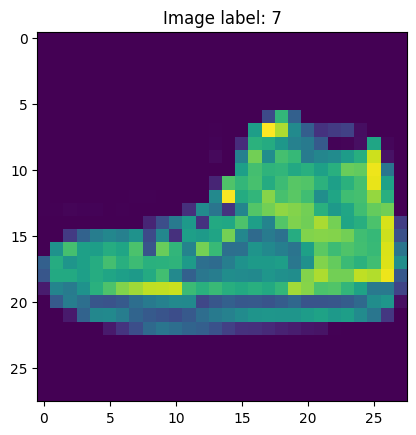

In [21]:
# do not change the code in the block below
# __________start of block__________

train_fmnist_data = FashionMNIST(
    ".", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_fmnist_data = FashionMNIST(
    ".", train=False, transform=torchvision.transforms.ToTensor(), download=True
)


train_data_loader = torch.utils.data.DataLoader(
    train_fmnist_data, batch_size=32, shuffle=True, num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_fmnist_data, batch_size=32, shuffle=False, num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f"Image label: {_label}")
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 88.5% accuracy.

__Внимание, ваша модель должна быть представлена именно переменной `model_task_1`. На вход ей должен приходить тензор размерностью (1, 28, 28).__

In [22]:
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Создание экземпляра модели
model_task_1 = FashionMNISTModel()
model_task_1.to(device)

FashionMNISTModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

Локальные тесты для проверки вашей модели доступны ниже:

In [23]:
# do not change the code in the block below
# __________start of block__________
assert model_task_1 is not None, "Please, use `model_task_1` variable to store your model"

try:
    x = random_batch[0].to(device)
    y = random_batch[1].to(device)

    # compute outputs given inputs, both are variables
    y_predicted = model_task_1(x)
except Exception as e:
    print("Something is wrong with the model")
    raise e


assert y_predicted.shape[-1] == 10, "Model should predict 10 logits/probas"

print("Everything seems fine!")
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Также рекомендуем поработать с `learning rate`.

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_task_1.parameters(), lr=1e-3)

# Функция для обучения модели
def train_epoch(model, dataloader, loss_fn, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        total_loss += loss.item()
        _, predicted = torch.max(pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
    
    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy

# Функция для валидации модели
def validate(model, dataloader, loss_fn):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            
            total_loss += loss.item()
            _, predicted = torch.max(pred.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    
    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy

# Обучение модели
epochs = 15
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_epoch(model_task_1, train_data_loader, loss_fn, optimizer)
    val_loss, val_acc = validate(model_task_1, test_data_loader, loss_fn)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    print("-------------------------------")

  7%|▋         | 1/15 [00:12<02:55, 12.55s/it]

Epoch 1/15
Train Loss: 0.2038, Train Acc: 0.9225
Val Loss: 0.3519, Val Acc: 0.8884
-------------------------------


 13%|█▎        | 2/15 [00:23<02:32, 11.75s/it]

Epoch 2/15
Train Loss: 0.1936, Train Acc: 0.9266
Val Loss: 0.3711, Val Acc: 0.8854
-------------------------------


 20%|██        | 3/15 [00:35<02:18, 11.56s/it]

Epoch 3/15
Train Loss: 0.1858, Train Acc: 0.9286
Val Loss: 0.3915, Val Acc: 0.8868
-------------------------------


 27%|██▋       | 4/15 [00:46<02:05, 11.44s/it]

Epoch 4/15
Train Loss: 0.1822, Train Acc: 0.9305
Val Loss: 0.3863, Val Acc: 0.8905
-------------------------------


 33%|███▎      | 5/15 [00:58<01:56, 11.69s/it]

Epoch 5/15
Train Loss: 0.1748, Train Acc: 0.9332
Val Loss: 0.3859, Val Acc: 0.8889
-------------------------------


 40%|████      | 6/15 [01:10<01:45, 11.75s/it]

Epoch 6/15
Train Loss: 0.1719, Train Acc: 0.9346
Val Loss: 0.3868, Val Acc: 0.8978
-------------------------------


 47%|████▋     | 7/15 [01:22<01:34, 11.77s/it]

Epoch 7/15
Train Loss: 0.1677, Train Acc: 0.9359
Val Loss: 0.3916, Val Acc: 0.8949
-------------------------------


 53%|█████▎    | 8/15 [01:34<01:22, 11.80s/it]

Epoch 8/15
Train Loss: 0.1614, Train Acc: 0.9374
Val Loss: 0.3967, Val Acc: 0.8974
-------------------------------


 60%|██████    | 9/15 [01:45<01:10, 11.80s/it]

Epoch 9/15
Train Loss: 0.1623, Train Acc: 0.9383
Val Loss: 0.3996, Val Acc: 0.8901
-------------------------------


 67%|██████▋   | 10/15 [01:57<00:59, 11.81s/it]

Epoch 10/15
Train Loss: 0.1524, Train Acc: 0.9408
Val Loss: 0.4920, Val Acc: 0.8864
-------------------------------


 73%|███████▎  | 11/15 [02:10<00:48, 12.08s/it]

Epoch 11/15
Train Loss: 0.1517, Train Acc: 0.9422
Val Loss: 0.4221, Val Acc: 0.8932
-------------------------------


 80%|████████  | 12/15 [02:22<00:36, 12.05s/it]

Epoch 12/15
Train Loss: 0.1484, Train Acc: 0.9425
Val Loss: 0.4513, Val Acc: 0.8962
-------------------------------


 87%|████████▋ | 13/15 [02:34<00:24, 12.02s/it]

Epoch 13/15
Train Loss: 0.1454, Train Acc: 0.9448
Val Loss: 0.4609, Val Acc: 0.8878
-------------------------------


 93%|█████████▎| 14/15 [02:46<00:12, 12.19s/it]

Epoch 14/15
Train Loss: 0.1414, Train Acc: 0.9466
Val Loss: 0.4669, Val Acc: 0.8952
-------------------------------


100%|██████████| 15/15 [02:58<00:00, 11.93s/it]

Epoch 15/15
Train Loss: 0.1386, Train Acc: 0.9463
Val Loss: 0.4724, Val Acc: 0.8868
-------------------------------


Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [35]:
train_acc_task_1 = get_accuracy(model_task_1, train_data_loader)
print(f"Neural network accuracy on train set: {train_acc_task_1:3.5}")

Neural network accuracy on train set: 0.94978


In [37]:
test_acc_task_1 = get_accuracy(model_task_1, test_data_loader)
print(f"Neural network accuracy on test set: {test_acc_task_1:3.5}")

Neural network accuracy on test set: 0.8868


Проверка, что необходимые пороги пройдены:

In [38]:
assert test_acc_task_1 >= 0.885, "Train accuracy is below 0.885 threshold"
assert (
    train_acc_task_1 >= 0.905
), "Train accuracy is below 0.905 while test accuracy is fine. We recommend to check your model and data flow"

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model_task_1`, а файл `hw_fmnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [39]:
# do not change the code in the block below
# __________start of block__________
assert os.path.exists(
    "hw_fmnist_data_dict.npy"
), "Please, download `hw_fmnist_data_dict.npy` and place it in the working directory"

loaded_data_dict = np.load("hw_fmnist_data_dict.npy", allow_pickle=True)

submission_dict = {
    "train_predictions_task_1": get_predictions(
        model_task_1, torch.FloatTensor(loaded_data_dict.item()["train"])
    ),
    "test_predictions_task_1": get_predictions(
        model_task_1, torch.FloatTensor(loaded_data_dict.item()["test"])
    ),
}

with open("submission_dict_fmnist_task_1.json", "w") as iofile:
    json.dump(submission_dict, iofile)
print("File saved to `submission_dict_fmnist_task_1.json`")
# __________end of block__________

File saved to `submission_dict_fmnist_task_1.json`
